# Chapter: Decision Trees and Ensemble Learning


# Topic: Robust fitting via Bagging: Illustration

In [1]:
# import
import numpy as np

In [2]:
# generate training samples
from sklearn import datasets
noisy_moons = datasets.make_moons(n_samples=200, noise=0.3, random_state=10)
X, y = noisy_moons

In [3]:
# fit DT model
from sklearn import tree
DT_model = tree.DecisionTreeClassifier().fit(X, y)

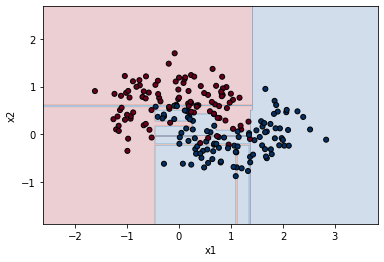

In [4]:
# plot decision surface of the decision tree
import matplotlib.pyplot as plt
plt.figure()
cmap = plt.cm.RdBu

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# create grid to evaluate model
Z = DT_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)

# plot the training data-points
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, cmap=cmap, s=25, edgecolor="k")
plt.xlabel('x1'), plt.ylabel('x2')
plt.show()

In [5]:
# fit bagging model
from sklearn.ensemble import BaggingClassifier
Bagging_model = BaggingClassifier(n_estimators=500, max_samples=50, random_state=100).fit(X, y)

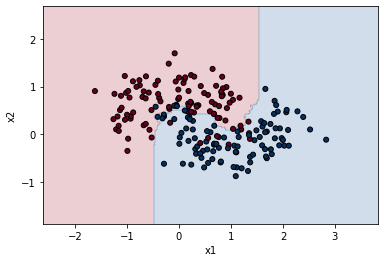

In [6]:
# plot decision surface of the decision tree
plt.figure()

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# create grid to evaluate model
Z = Bagging_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)

# plot the trainign data-points
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, cmap=cmap, s=25, edgecolor="k")
plt.xlabel('x1'), plt.ylabel('x2')
plt.show()